In [100]:
import os
import sys
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline

## read command datsets

In [107]:

cmds = pd.read_csv( os.path.expanduser( '~/.datasets/txt/commands.csv') )
cmds.head()


,Command,Domain,Index_domain,Index_subset,Subset
0,disable Wifi,@wifi:,1,1,$m_disable:
1,turn off Wifi,@wifi:,1,1,$m_disable:
2,stop Wifi,@wifi:,1,1,$m_disable:
3,Wifi off,@wifi:,1,1,$m_disable:
4,turn off the Wifi,@wifi:,1,1,$m_disable:


[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48]
[11 11 82 60  9 10  8  9  6  6 25  7 28 20  9 18 14 17 12 11 10  8  8 15
 14  8  9 18  4  4  6 10 29  9  7  7  7  7 13 12 21 12 13  1  2 16  9  5]


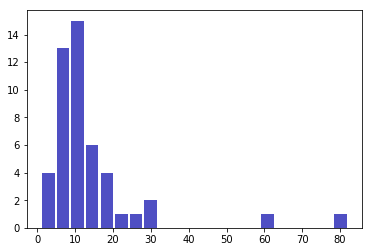

In [110]:
classes, phrases = cmds['Index_subset'], cmds['Command'] 
C,F = np.unique( classes, return_counts=True)
cls2inx = { c:i for i,c in enumerate( C ) }

print(C)
print(F)

# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=F, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)



In [111]:

filepath= os.path.expanduser( '~/.datasets/txt/dbcommand.csv' )
db = [ { 'phrases':w, 'classes':c} for c,w in zip( classes, phrases ) if F[ cls2inx[c] ] > 1  ]
db = pd.DataFrame( db )
db.to_csv(filepath, index=False, encoding='utf-8')


In [118]:
import random 

def get_pairs( dataset, n=5 ):
    
    pairs = [] 
    classes, phrases = dataset[:,0], dataset[:,1]
    C,F = np.unique( classes, return_counts=True )
        
    for c,f in zip(C,F):         
        # a, b   
        a = np.array( np.random.choice( np.where(classes==c)[0], min(f,n), replace=False ))
        b = np.array( np.random.choice( np.where(classes==c)[0], min(f,n), replace=False ))
        #while np.any((a-b)==0): #aligning check
        while np.sum((a-b) == 0 )/b.shape[0] > 0.1: #aligning check
            random.shuffle(b) 
        pairs += zip(phrases[a],phrases[b])
        #print(c, a,b)
    
    random.shuffle(pairs)
    return pairs
    
    
filepath = os.path.expanduser( '~/.datasets/txt/commandpairs.txt' )
db = pd.read_csv( '~/.datasets/txt/dbcommand.csv' )
db = db.values

pairs = get_pairs(db, n=20)
with open(filepath, "w") as f:
    for pair in pairs:
        f.write( '{}\t{}\n'.format( pair[0], pair[1] ) ) 

print('Save command pairs ...')
print( pairs[0] )
print( len(pairs) )


Save command pairs ...
('call up', 'make a call to')
531
